In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = r"E:\Delphi Analytics Project Work\Data_Extract_20241022-20241028_r1_id1.xlsx"  # Replace with your file path
df = pd.read_excel(file_path, header=None)  # Load without assuming headers

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,field,VA_avg,A_avg,Wh_sum,Hz_avg,VAphA_avg,AphA_avg,VARphA_avg,PPVphAB_avg,PhVphA_avg,...,PF_avg,VAR_avg,TotVAhExp_avg,TotVARhExp_max,TotWhExp_max,TotVAhImp_avg,TotVARhImp_max,TotWhImp_max,PPV_avg,PhV_avg
1,timestamp,indregTC - A08 EB-MFM - Measured AC Apparent P...,"indregTC - A08 EB-MFM - Measured AC Current, a...","indregTC - A08 EB-MFM - Measured AC Energy, su...","indregTC - A08 EB-MFM - Measured AC Frequency,...",indregTC - A08 EB-MFM - Measured AC Phase A Ap...,indregTC - A08 EB-MFM - Measured AC Phase A Cu...,indregTC - A08 EB-MFM - Measured AC Phase A Re...,indregTC - A08 EB-MFM - Measured AC Phase A to...,indregTC - A08 EB-MFM - Measured AC Phase A Vo...,...,indregTC - A08 EB-MFM - Measured AC Power Fact...,indregTC - A08 EB-MFM - Measured AC Reactive P...,indregTC - A08 EB-MFM - Measured AC Total Expo...,indregTC - A08 EB-MFM - Measured AC Total Expo...,indregTC - A08 EB-MFM - Measured AC Total Expo...,indregTC - A08 EB-MFM - Measured AC Total Impo...,indregTC - A08 EB-MFM - Measured AC Total Impo...,indregTC - A08 EB-MFM - Measured AC Total Impo...,indregTC - A08 EB-MFM - Measured AC Voltage L-...,indregTC - A08 EB-MFM - Measured AC Voltage L-...
2,10/22/2024 00:00:00,820.553,42.932,67,49.956,274.695,0.043,19.442,11012.111,6356.653,...,1.002,-18.27,9050220,947690.625,8611795,841.102,249087.984,202.034,11034.374,6371.041
3,10/22/2024 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/22/2024 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# First and second rows for field names and detailed descriptions
field_names = df.iloc[0]  # First row
detailed_names = df.iloc[1]  # Second row

# Function to create short column names with phase and unit info
def shorten_column_name(field_name, detailed_name):
    try:
        # Extract the prefix
        prefix = "indregTC1"  # Example prefix; can be customized

        # If the field name is 'timestamp', keep it as is
        if field_name.strip().lower() == "timestamp":
            return f"{prefix}_timestamp"

        # Extract the field name (short identifier)
        field = field_name.strip()

        # Extract the detailed description (remove 'Measured' and extra parts)
        description = detailed_name.split(" - ")[-1].split(",")[0].strip()

        # Remove unnecessary words like 'AC' and 'Measured'
        description = description.replace("Measured", "").replace("AC", "").strip()

        # Initialize phase as an empty string
        phase = ""
        
        # Extract the phase information from the description and remove it from the description
        if "Phase A" in description:
            phase = "Phase A"
            description = description.replace("Phase A", "").strip()
        elif "Phase B" in description:
            phase = "Phase B"
            description = description.replace("Phase B", "").strip()
        elif "Phase C" in description:
            phase = "Phase C"
            description = description.replace("Phase C", "").strip()

        # Extract the unit from the description
        unit = detailed_name.split(",")[-1].strip(" ()")

        # Extract the measurement type (e.g., avg, max, etc.)
        measurement_type = ""
        if "avg" in detailed_name:
            measurement_type = "avg"
        elif "max" in detailed_name:
            measurement_type = "max"
        elif "sum" in detailed_name:
            measurement_type = "sum"

        # Build column name like: indregTC1_<description>_<phase>_<unit>_(measurement_type)
        if phase:
            return f"{prefix}_{description}_{phase}_{unit}_{measurement_type}"
        else:
            return f"{prefix}_{description}_{unit}_{measurement_type}"
    except IndexError:
        # If unexpected format, return original field name
        return field_name

# Combine field names and detailed descriptions to create new column names
short_column_names = []
for field, detail in zip(field_names, detailed_names):
    short_column_names.append(shorten_column_name(field, detail))

# Update the DataFrame with the new column names
df.columns = short_column_names
df = df.iloc[2:]  # Remove the first two rows as they are now the header

In [5]:
df.head()

,indregTC1_timestamp_timestamp_,indregTC1_Apparent Power_kVA_avg,indregTC1_Current_A_avg,indregTC1_Energy_kWh_sum,indregTC1_Frequency_Hz_avg,indregTC1_Apparent Power_Phase A_kVA_avg,indregTC1_Current_Phase A_A_avg,indregTC1_Reactive Power_Phase A_kVAR_avg,indregTC1_to Phase B Voltage_Phase A_V_avg,indregTC1_Voltage_Phase A_V_avg,...,indregTC1_Power Factor_avg_avg,indregTC1_Reactive Power_kVAR_avg,indregTC1_Total Exported Apparent Energy_kVAh_avg,indregTC1_Total Exported Reactive Energy_kVARh_max,indregTC1_Total Exported Real Energy_kWh_max,indregTC1_Total Imported Apparent Energy_kVAh_avg,indregTC1_Total Imported Reactive Energy_kVARh_max,indregTC1_Total Imported Real Energy_kWh_max,indregTC1_Voltage L-L_V_avg,indregTC1_Voltage L-N_V_avg
2,10/22/2024 00:00:00,820.553,42.932,67,49.956,274.695,0.043,19.442,11012.111,6356.653,...,1.002,-18.27,9050220,947690.625,8611795,841.102,249087.984,202.034,11034.374,6371.041
3,10/22/2024 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/22/2024 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10/22/2024 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10/22/2024 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.rename(columns={'indregTC1_timestamp_timestamp_': 'indregTC1_timestamp'}, inplace=True)

In [9]:
df.head(10)

,indregTC1_timestamp,indregTC1_Apparent Power_kVA_avg,indregTC1_Current_A_avg,indregTC1_Energy_kWh_sum,indregTC1_Frequency_Hz_avg,indregTC1_Apparent Power_Phase A_kVA_avg,indregTC1_Current_Phase A_A_avg,indregTC1_Reactive Power_Phase A_kVAR_avg,indregTC1_to Phase B Voltage_Phase A_V_avg,indregTC1_Voltage_Phase A_V_avg,...,indregTC1_Power Factor_avg_avg,indregTC1_Reactive Power_kVAR_avg,indregTC1_Total Exported Apparent Energy_kVAh_avg,indregTC1_Total Exported Reactive Energy_kVARh_max,indregTC1_Total Exported Real Energy_kWh_max,indregTC1_Total Imported Apparent Energy_kVAh_avg,indregTC1_Total Imported Reactive Energy_kVARh_max,indregTC1_Total Imported Real Energy_kWh_max,indregTC1_Voltage L-L_V_avg,indregTC1_Voltage L-N_V_avg
2,10/22/2024 00:00:00,820.553,42.932,67,49.956,274.695,0.043,19.442,11012.111,6356.653,...,1.002,-18.27,9050220,947690.625,8611795,841.102,249087.984,202.034,11034.374,6371.041
3,10/22/2024 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/22/2024 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10/22/2024 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10/22/2024 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10/22/2024 00:05:00,820.889,42.924,69,49.889,273.611,0.043,-19.154,11020.1,6362,...,1.002,-56.307,9050289,947692.875,8611864,841.102,249089.438,202.034,11040.872,6374.801
8,10/22/2024 00:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10/22/2024 00:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10/22/2024 00:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,10/22/2024 00:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()  # here we can see that there are various null values

indregTC1_timestamp                                      0
indregTC1_Apparent Power_kVA_avg                      7715
indregTC1_Current_A_avg                               7715
indregTC1_Energy_kWh_sum                              7715
indregTC1_Frequency_Hz_avg                            7715
indregTC1_Apparent Power_Phase A_kVA_avg              7715
indregTC1_Current_Phase A_A_avg                       7715
indregTC1_Reactive Power_Phase A_kVAR_avg             7715
indregTC1_to Phase B Voltage_Phase A_V_avg            7715
indregTC1_Voltage_Phase A_V_avg                       7715
indregTC1_Apparent Power_Phase B_kVA_avg              7715
indregTC1_Current_Phase B_A_avg                       7715
indregTC1_Reactive Power_Phase B_kVAR_avg             7715
indregTC1_to Phase C Voltage_Phase B_V_avg            7715
indregTC1_Voltage_Phase B_V_avg                       7715
indregTC1_Apparent Power_Phase C_kVA_avg              7715
indregTC1_Current_Phase C_A_avg                       77

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 2 to 9645
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   indregTC1_timestamp                                 9644 non-null   object
 1   indregTC1_Apparent Power_kVA_avg                    1929 non-null   object
 2   indregTC1_Current_A_avg                             1929 non-null   object
 3   indregTC1_Energy_kWh_sum                            1929 non-null   object
 4   indregTC1_Frequency_Hz_avg                          1929 non-null   object
 5   indregTC1_Apparent Power_Phase A_kVA_avg            1929 non-null   object
 6   indregTC1_Current_Phase A_A_avg                     1929 non-null   object
 7   indregTC1_Reactive Power_Phase A_kVAR_avg           1929 non-null   object
 8   indregTC1_to Phase B Voltage_Phase A_V_avg          1929 non-null   object
 9   indregTC

As all the columns are in object Dtype, we need to convert them into numeric Dtype expect timestamp column

In [12]:
# Exclude the 'timestamp' column from conversion
columns_to_convert = df.columns.difference(['indregTC1_timestamp'])

# Convert all other columns to numeric where possible
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [13]:
df.head()

,indregTC1_timestamp,indregTC1_Apparent Power_kVA_avg,indregTC1_Current_A_avg,indregTC1_Energy_kWh_sum,indregTC1_Frequency_Hz_avg,indregTC1_Apparent Power_Phase A_kVA_avg,indregTC1_Current_Phase A_A_avg,indregTC1_Reactive Power_Phase A_kVAR_avg,indregTC1_to Phase B Voltage_Phase A_V_avg,indregTC1_Voltage_Phase A_V_avg,...,indregTC1_Power Factor_avg_avg,indregTC1_Reactive Power_kVAR_avg,indregTC1_Total Exported Apparent Energy_kVAh_avg,indregTC1_Total Exported Reactive Energy_kVARh_max,indregTC1_Total Exported Real Energy_kWh_max,indregTC1_Total Imported Apparent Energy_kVAh_avg,indregTC1_Total Imported Reactive Energy_kVARh_max,indregTC1_Total Imported Real Energy_kWh_max,indregTC1_Voltage L-L_V_avg,indregTC1_Voltage L-N_V_avg
2,10/22/2024 00:00:00,820.553,42.932,67.0,49.956,274.695,0.043,19.442,11012.111,6356.653,...,1.002,-18.27,9050220.0,947690.625,8611795.0,841.102,249087.984,202.034,11034.374,6371.041
3,10/22/2024 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/22/2024 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10/22/2024 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10/22/2024 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we will use interpolation to fill the null values

In [14]:
# Exclude the timestamp column explicitly
df_numeric = df.drop(columns=['indregTC1_timestamp']).select_dtypes(include=['number'])
df_numeric.interpolate(method='linear', inplace=True)
df_numeric.ffill(inplace=True)
df_numeric.bfill(inplace=True)

# Reassign the numeric columns back to the original DataFrame
df[df_numeric.columns] = df_numeric


In [15]:
df.head(15)

,indregTC1_timestamp,indregTC1_Apparent Power_kVA_avg,indregTC1_Current_A_avg,indregTC1_Energy_kWh_sum,indregTC1_Frequency_Hz_avg,indregTC1_Apparent Power_Phase A_kVA_avg,indregTC1_Current_Phase A_A_avg,indregTC1_Reactive Power_Phase A_kVAR_avg,indregTC1_to Phase B Voltage_Phase A_V_avg,indregTC1_Voltage_Phase A_V_avg,...,indregTC1_Power Factor_avg_avg,indregTC1_Reactive Power_kVAR_avg,indregTC1_Total Exported Apparent Energy_kVAh_avg,indregTC1_Total Exported Reactive Energy_kVARh_max,indregTC1_Total Exported Real Energy_kWh_max,indregTC1_Total Imported Apparent Energy_kVAh_avg,indregTC1_Total Imported Reactive Energy_kVARh_max,indregTC1_Total Imported Real Energy_kWh_max,indregTC1_Voltage L-L_V_avg,indregTC1_Voltage L-N_V_avg
2,10/22/2024 00:00:00,820.5530,42.9320,67.0,49.9560,274.6950,0.0430,19.4420,11012.1110,6356.6530,...,1.0020,-18.2700,9050220.0,947690.6250,8611795.0,841.102,249087.9840,202.034,11034.3740,6371.0410
3,10/22/2024 00:01:00,820.6202,42.9304,67.4,49.9426,274.4782,0.0430,11.7228,11013.7088,6357.7224,...,1.0020,-25.8774,9050233.8,947691.0750,8611808.8,841.102,249088.2748,202.034,11035.6736,6371.7930
4,10/22/2024 00:02:00,820.6874,42.9288,67.8,49.9292,274.2614,0.0430,4.0036,11015.3066,6358.7918,...,1.0020,-33.4848,9050247.6,947691.5250,8611822.6,841.102,249088.5656,202.034,11036.9732,6372.5450
5,10/22/2024 00:03:00,820.7546,42.9272,68.2,49.9158,274.0446,0.0430,-3.7156,11016.9044,6359.8612,...,1.0020,-41.0922,9050261.4,947691.9750,8611836.4,841.102,249088.8564,202.034,11038.2728,6373.2970
6,10/22/2024 00:04:00,820.8218,42.9256,68.6,49.9024,273.8278,0.0430,-11.4348,11018.5022,6360.9306,...,1.0020,-48.6996,9050275.2,947692.4250,8611850.2,841.102,249089.1472,202.034,11039.5724,6374.0490
7,10/22/2024 00:05:00,820.8890,42.9240,69.0,49.8890,273.6110,0.0430,-19.1540,11020.1000,6362.0000,...,1.0020,-56.3070,9050289.0,947692.8750,8611864.0,841.102,249089.4380,202.034,11040.8720,6374.8010
8,10/22/2024 00:06:00,819.9926,42.8684,68.8,49.8998,273.3422,0.0430,-19.2190,11022.1782,6363.1960,...,1.0022,-56.6340,9050302.8,947693.3126,8611877.6,841.102,249089.7942,202.034,11043.1296,6376.1040
9,10/22/2024 00:07:00,819.0962,42.8128,68.6,49.9106,273.0734,0.0430,-19.2840,11024.2564,6364.3920,...,1.0024,-56.9610,9050316.6,947693.7502,8611891.2,841.102,249090.1504,202.034,11045.3872,6377.4070
10,10/22/2024 00:08:00,818.1998,42.7572,68.4,49.9214,272.8046,0.0430,-19.3490,11026.3346,6365.5880,...,1.0026,-57.2880,9050330.4,947694.1878,8611904.8,841.102,249090.5066,202.034,11047.6448,6378.7100
11,10/22/2024 00:09:00,817.3034,42.7016,68.2,49.9322,272.5358,0.0430,-19.4140,11028.4128,6366.7840,...,1.0028,-57.6150,9050344.2,947694.6254,8611918.4,841.102,249090.8628,202.034,11049.9024,6380.0130


In [17]:
df.isnull().sum()

indregTC1_timestamp                                   0
indregTC1_Apparent Power_kVA_avg                      0
indregTC1_Current_A_avg                               0
indregTC1_Energy_kWh_sum                              0
indregTC1_Frequency_Hz_avg                            0
indregTC1_Apparent Power_Phase A_kVA_avg              0
indregTC1_Current_Phase A_A_avg                       0
indregTC1_Reactive Power_Phase A_kVAR_avg             0
indregTC1_to Phase B Voltage_Phase A_V_avg            0
indregTC1_Voltage_Phase A_V_avg                       0
indregTC1_Apparent Power_Phase B_kVA_avg              0
indregTC1_Current_Phase B_A_avg                       0
indregTC1_Reactive Power_Phase B_kVAR_avg             0
indregTC1_to Phase C Voltage_Phase B_V_avg            0
indregTC1_Voltage_Phase B_V_avg                       0
indregTC1_Apparent Power_Phase C_kVA_avg              0
indregTC1_Current_Phase C_A_avg                       0
indregTC1_Reactive Power_Phase C_kVAR_avg       

Now there are no null values remaining

In [18]:
# Convert timestamp to datetime
df['indregTC1_timestamp'] = pd.to_datetime(df['indregTC1_timestamp'], errors='coerce')

In [19]:
print(df.dtypes)

indregTC1_timestamp                                   datetime64[ns]
indregTC1_Apparent Power_kVA_avg                             float64
indregTC1_Current_A_avg                                      float64
indregTC1_Energy_kWh_sum                                     float64
indregTC1_Frequency_Hz_avg                                   float64
indregTC1_Apparent Power_Phase A_kVA_avg                     float64
indregTC1_Current_Phase A_A_avg                              float64
indregTC1_Reactive Power_Phase A_kVAR_avg                    float64
indregTC1_to Phase B Voltage_Phase A_V_avg                   float64
indregTC1_Voltage_Phase A_V_avg                              float64
indregTC1_Apparent Power_Phase B_kVA_avg                     float64
indregTC1_Current_Phase B_A_avg                              float64
indregTC1_Reactive Power_Phase B_kVAR_avg                    float64
indregTC1_to Phase C Voltage_Phase B_V_avg                   float64
indregTC1_Voltage_Phase B_V_avg   

Now timestamp has been converted to Datetime

Now, we will check for any duplicates in the dataset

In [20]:
# Check for duplicates
print(df.duplicated().sum())

0


There are no duplicates present

In [24]:
df.columns = df.columns.str.replace(' ', '_')
print(df.columns)  # Verify column names

Index(['indregTC1_timestamp', 'indregTC1_Apparent_Power_kVA_avg',
       'indregTC1_Current_A_avg', 'indregTC1_Energy_kWh_sum',
       'indregTC1_Frequency_Hz_avg',
       'indregTC1_Apparent_Power_Phase_A_kVA_avg',
       'indregTC1_Current_Phase_A_A_avg',
       'indregTC1_Reactive_Power_Phase_A_kVAR_avg',
       'indregTC1_to_Phase_B_Voltage_Phase_A_V_avg',
       'indregTC1_Voltage_Phase_A_V_avg',
       'indregTC1_Apparent_Power_Phase_B_kVA_avg',
       'indregTC1_Current_Phase_B_A_avg',
       'indregTC1_Reactive_Power_Phase_B_kVAR_avg',
       'indregTC1_to_Phase_C_Voltage_Phase_B_V_avg',
       'indregTC1_Voltage_Phase_B_V_avg',
       'indregTC1_Apparent_Power_Phase_C_kVA_avg',
       'indregTC1_Current_Phase_C_A_avg',
       'indregTC1_Reactive_Power_Phase_C_kVAR_avg',
       'indregTC1_Phase_C_to__Voltage_Phase_A_V_avg',
       'indregTC1_Voltage_Phase_C_V_avg', 'indregTC1_Power_kW_avg',
       'indregTC1_Power_A_kW_avg', 'indregTC1_Power_B_kW_avg',
       'indregTC1_Power_C

Now we will detect outliers, if there are any

In [26]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

In [27]:
# Create a DataFrame to store outliers
outliers_dict = {}

# Calculate IQR for each numeric column
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Store outliers in dictionary for each column
    outliers_dict[col] = outliers

# Print outliers for each column (if any)
for col, outliers in outliers_dict.items():
    if not outliers.empty:
        print(f"Outliers in {col}:")
        print(outliers)

Outliers in indregTC1_Frequency_Hz_avg:
     indregTC1_timestamp  indregTC1_Apparent_Power_kVA_avg  \
37   2024-10-22 00:35:00                          833.2820   
38   2024-10-22 00:36:00                          834.2782   
39   2024-10-22 00:37:00                          835.2744   
40   2024-10-22 00:38:00                          836.2706   
41   2024-10-22 00:39:00                          837.2668   
...                  ...                               ...   
9641 2024-10-28 16:39:00                          730.6606   
9642 2024-10-28 16:40:00                          733.9030   
9643 2024-10-28 16:41:00                          733.9030   
9644 2024-10-28 16:42:00                          733.9030   
9645 2024-10-28 16:43:00                          733.9030   

      indregTC1_Current_A_avg  indregTC1_Energy_kWh_sum  \
37                    43.4560                      68.0   
38                    43.5132                      68.0   
39                    43.5704         

We will keep the outliers as it depicts the genuine data values recorded

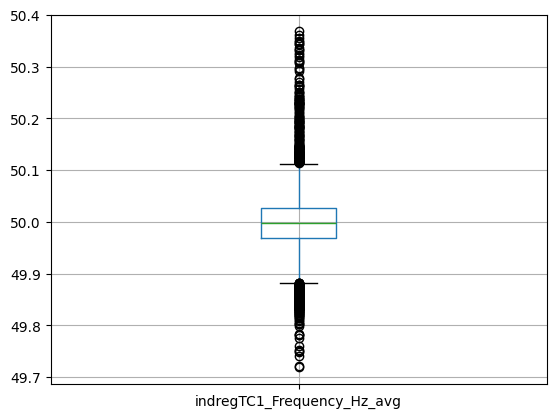

In [28]:
df[['indregTC1_Frequency_Hz_avg']].boxplot()
plt.show()

In [31]:
df.head()

,indregTC1_timestamp,indregTC1_Apparent_Power_kVA_avg,indregTC1_Current_A_avg,indregTC1_Energy_kWh_sum,indregTC1_Frequency_Hz_avg,indregTC1_Apparent_Power_Phase_A_kVA_avg,indregTC1_Current_Phase_A_A_avg,indregTC1_Reactive_Power_Phase_A_kVAR_avg,indregTC1_to_Phase_B_Voltage_Phase_A_V_avg,indregTC1_Voltage_Phase_A_V_avg,...,indregTC1_Power_Factor_avg_avg,indregTC1_Reactive_Power_kVAR_avg,indregTC1_Total_Exported_Apparent_Energy_kVAh_avg,indregTC1_Total_Exported_Reactive_Energy_kVARh_max,indregTC1_Total_Exported_Real_Energy_kWh_max,indregTC1_Total_Imported_Apparent_Energy_kVAh_avg,indregTC1_Total_Imported_Reactive_Energy_kVARh_max,indregTC1_Total_Imported_Real_Energy_kWh_max,indregTC1_Voltage_L-L_V_avg,indregTC1_Voltage_L-N_V_avg
2,2024-10-22 00:00:00,820.5530,42.9320,67.0,49.9560,274.6950,0.043,19.4420,11012.1110,6356.6530,...,1.002,-18.2700,9050220.0,947690.625,8611795.0,841.102,249087.9840,202.034,11034.3740,6371.041
3,2024-10-22 00:01:00,820.6202,42.9304,67.4,49.9426,274.4782,0.043,11.7228,11013.7088,6357.7224,...,1.002,-25.8774,9050233.8,947691.075,8611808.8,841.102,249088.2748,202.034,11035.6736,6371.793
4,2024-10-22 00:02:00,820.6874,42.9288,67.8,49.9292,274.2614,0.043,4.0036,11015.3066,6358.7918,...,1.002,-33.4848,9050247.6,947691.525,8611822.6,841.102,249088.5656,202.034,11036.9732,6372.545
5,2024-10-22 00:03:00,820.7546,42.9272,68.2,49.9158,274.0446,0.043,-3.7156,11016.9044,6359.8612,...,1.002,-41.0922,9050261.4,947691.975,8611836.4,841.102,249088.8564,202.034,11038.2728,6373.297
6,2024-10-22 00:04:00,820.8218,42.9256,68.6,49.9024,273.8278,0.043,-11.4348,11018.5022,6360.9306,...,1.002,-48.6996,9050275.2,947692.425,8611850.2,841.102,249089.1472,202.034,11039.5724,6374.049


In [38]:
print(df.info())  # Check data types and non-null counts
print(df.describe())  # Verify statistical summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 2 to 9645
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   indregTC1_timestamp                                 9644 non-null   datetime64[ns]
 1   indregTC1_Apparent_Power_kVA_avg                    9644 non-null   float64       
 2   indregTC1_Current_A_avg                             9644 non-null   float64       
 3   indregTC1_Energy_kWh_sum                            9644 non-null   float64       
 4   indregTC1_Frequency_Hz_avg                          9644 non-null   float64       
 5   indregTC1_Apparent_Power_Phase_A_kVA_avg            9644 non-null   float64       
 6   indregTC1_Current_Phase_A_A_avg                     9644 non-null   float64       
 7   indregTC1_Reactive_Power_Phase_A_kVAR_avg           9644 non-null   float64       
 8   indregTC

In [40]:
output_file_path = r"E:\Delphi Analytics Project Work\cleaned_solar_data_Site_1.csv"  # Specify your desired output file name
df.to_csv(output_file_path, index=False)
print('File created and saved at mentioned path')

File created and saved at mentioned path
